# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

*Для начала необходимо импортировать все вспомогательные библиотеки (для импорта датафрейма, для работы с моделями, для их проверки и для построения графиков)*

In [1]:
# Основная библиотека для импорта данных и создания вспомогательных таблиц
import pandas as pd

# Библиотека для разбиения датасета на выборки
from sklearn.model_selection import train_test_split

# Библиотеки для формирования моделей 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Библиотеки для расчета метрик моделей
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

# Библиотеки для построения графиков
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Откройте и изучите файл

*В этом разделе посмотрим на объем данных и на их содержание. Предполагаем, что преобразовывать данные нам не надо, соответственно у нас должен быть уже готовый датасет (как минимум, без пропусков)*

In [2]:
df = pd.read_csv('/datasets/users_behavior.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
calls       3214 non-null float64
minutes     3214 non-null float64
messages    3214 non-null float64
mb_used     3214 non-null float64
is_ultra    3214 non-null int64
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [3]:
df.sample(5)

,calls,minutes,messages,mb_used,is_ultra
897,29.0,203.62,30.0,19527.95,0
2583,41.0,250.28,6.0,14495.76,0
2520,73.0,620.25,0.0,21098.49,0
2860,87.0,667.18,80.0,10683.75,1
1332,67.0,506.16,0.0,23867.03,1


<font color=darkgreen><b>Анализ данных показал следующее:</b></font>

 1. Датасет заполнен, пропусков нет.
 2. Наименования колонок приведены к нормальному виду (без пропусков) и нижнему регистру.
 3. Нам необходимо решить задачу классификации, т.е. в зависимости от поведения пользователя определить, какой тариф ему предлагать - **'Смарт'** или **'Ультра'**.
 4. В качестве целевого параметра будем использовать колонку, **'is_ultra'**. 

## 2. Разбейте данные на выборки

Т.к. у нас нет независимой тестовой выборки, разделим исходный общий датасет случайным образом на <font color=darkred><b>три группы</b></font> для формирования тренировочной, валидационной и тестовой выборок. Разбивать будем по принципу <font color=darkred><b>3:1:1 (три части - тренировочная выборка, и по одной на тестовую и валидационную)</b></font>.

**Используем метод train_test_split. Сначала из общего датасета выделим тестовую выборку (20% от общей). Затем разобъем оставшииеся данные на две части в пропорци 75% (тренировочная выборка) и 25% (валидационная выборка).**

In [4]:
# выделим тестовую выборку и посмотрим на нее
df_train_valid, df_test = train_test_split(df, test_size=0.20, random_state=12345)

df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 643 entries, 1415 to 1196
Data columns (total 5 columns):
calls       643 non-null float64
minutes     643 non-null float64
messages    643 non-null float64
mb_used     643 non-null float64
is_ultra    643 non-null int64
dtypes: float64(4), int64(1)
memory usage: 30.1 KB


In [5]:
df_test.sample(5)

,calls,minutes,messages,mb_used,is_ultra
2073,44.0,394.88,10.0,3513.29,0
1552,105.0,724.57,158.0,39930.07,1
3145,23.0,130.53,15.0,6939.99,0
1052,39.0,240.63,14.0,4049.96,1
2913,84.0,588.71,67.0,22456.40,0


In [6]:
# оставшуюся выборку разобъем на тренировочную и валидационную
df_train, df_valid = train_test_split(df_train_valid, test_size=0.25, random_state=12345)

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928 entries, 2656 to 510
Data columns (total 5 columns):
calls       1928 non-null float64
minutes     1928 non-null float64
messages    1928 non-null float64
mb_used     1928 non-null float64
is_ultra    1928 non-null int64
dtypes: float64(4), int64(1)
memory usage: 90.4 KB


In [7]:
df_train.sample(5)

,calls,minutes,messages,mb_used,is_ultra
2814,80.0,554.10,17.0,10823.78,0
85,90.0,633.11,61.0,21561.54,0
2237,12.0,93.20,0.0,9037.67,1
2758,61.0,452.35,57.0,20224.40,0
2368,82.0,539.18,46.0,16021.77,0


In [8]:
df_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 643 entries, 2699 to 1806
Data columns (total 5 columns):
calls       643 non-null float64
minutes     643 non-null float64
messages    643 non-null float64
mb_used     643 non-null float64
is_ultra    643 non-null int64
dtypes: float64(4), int64(1)
memory usage: 30.1 KB


In [9]:
df_valid.sample(5)

,calls,minutes,messages,mb_used,is_ultra
1769,50.0,320.63,60.0,19331.57,0
1632,4.0,19.85,28.0,13107.42,0
1028,72.0,445.20,53.0,18696.44,1
3020,31.0,213.57,47.0,31112.79,1
658,48.0,325.93,37.0,13603.07,0


В результате разбиения <font color=orange><b>из общей выборки в 3 214 строк</b></font>, получилось <font color=orange><b>две выборки по 643 строки (для валидации и тестирования)</b></font> и <font color=orange><b>одна выборка для тренировки моделей (1 928) строк</b></font>.

## 3. Исследуйте модели

Для нашего исследования мы возьмем три варианта моделей, подходящих для решения задачи классификации: модель **логистической регрессии**, модель **'Дерево решений'** и модель **'Случайный лес'**.

Модель логистической регрессии не подлежит переобучению, поэтому для нее не требуется подбор гиперпараметров. Для двух остальных подберем наиболее значимые параметры. Для дерева решений возьмем **гиперпараметр 'Глубина дерева' (просчитаем варианты от 1 до 50)**, а для модели 'Случайный лес' - **гиперпараметр 'Количество оценщиков' (варианты от 1 до 30)**.

<font color=darkred><b>Мы обучем эти модели при помощи одинакового набора данных (тренировочной выборки) и на валидационной выборке оценим точность каждой из них.</b></font> 

<font color=darkblue><b>В дальнейшую работу возьмем по одной модели каждого вида, с теми параметрами, которые дадут наибольшую точность прогнозирования (accuracy) на валидационной выборке.</b></font>

In [10]:
# Формируем свойства и цели для тренировочной выборки
train_features = df_train.drop(['is_ultra'], axis=1)
train_target = df_train['is_ultra']

# Формируем свойства и цели для валидационной выборки
valid_features = df_valid.drop(['is_ultra'], axis=1)
valid_target = df_valid['is_ultra']

# Формируем свойства и цели для тестовой выборки
test_features = df_test.drop(['is_ultra'], axis=1)
test_target = df_test['is_ultra']

In [11]:
# Создадим сравнительный датасет
compare = {'model_name' : [],
           'hyperparam_name' : [],
           'hyperparam_value' : [],
           'accuracy' : [],
           'mce' : [],
           'rmce' : []
           }

compare_data_valid = pd.DataFrame(compare)

In [12]:
# Логистическая регрессия (создание модели)
model_logistic_regression = LogisticRegression(random_state=12345)
model_logistic_regression.fit(train_features, train_target)

valid_model_logistic_regression_predictions = model_logistic_regression.predict(valid_features)

accuracy_model_logistic_regression = accuracy_score(valid_target, valid_model_logistic_regression_predictions)

msk_model_logistic_regression = mean_squared_error(valid_target,valid_model_logistic_regression_predictions)

compare_data_valid = compare_data_valid.append(pd.DataFrame([['Логистическая регрессия', 
                                                              '',
                                                              0, 
                                                              accuracy_model_logistic_regression,
                                                              msk_model_logistic_regression,
                                                              msk_model_logistic_regression**0.5]], 
                                                              columns = ['model_name', 
                                                                         'hyperparam_name', 
                                                                         'hyperparam_value', 
                                                                         'accuracy',
                                                                         'mce',
                                                                         'rmce']),
                                                              ignore_index=True)

compare_data_valid[['model_name','accuracy']]

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,model_name,accuracy
0,Логистическая регрессия,0.696734


In [13]:
# Дерево решений (подбор параметров)

best_accuracy = 0

for depth in range(1, 50):
    
    model_tree = DecisionTreeClassifier(random_state=12345, max_depth = depth)
    model_tree.fit(train_features, train_target)
    
    valid_model_tree_predictions = model_tree.predict(valid_features)

    accuracy_model_tree = accuracy_score(valid_target, valid_model_tree_predictions)
    
    msk_model_tree = mean_squared_error(valid_target,valid_model_tree_predictions)
    
    if best_accuracy < accuracy_model_tree:
        best_accuracy = accuracy_model_tree
        best_depth = depth
        best_msk = msk_model_tree
        best_model_tree = model_tree
        
compare_data_valid = compare_data_valid.append(pd.DataFrame([['Дерево решений', 
                                                              'max_depth',
                                                              best_depth, 
                                                              best_accuracy,
                                                              best_msk,
                                                              best_msk**0.5]], 
                                                              columns = ['model_name', 
                                                                         'hyperparam_name', 
                                                                         'hyperparam_value', 
                                                                         'accuracy',
                                                                         'mce',
                                                                         'rmce']),
                                                              ignore_index=True)

compare_data_valid[['model_name','hyperparam_name','hyperparam_value','accuracy']]

,model_name,hyperparam_name,hyperparam_value,accuracy
0,Логистическая регрессия,,0.0,0.696734
1,Дерево решений,max_depth,7.0,0.774495


In [14]:
# Случайный лес (подбор параметров)

best_accuracy = 0

for n_estim in range(1, 30):
    
    model_random_forrest = RandomForestClassifier(random_state=12345, n_estimators=n_estim)
    model_random_forrest.fit(train_features, train_target)
    
    valid_model_random_forrest_predictions = model_random_forrest.predict(valid_features)

    accuracy_model_random_forrest = accuracy_score(valid_target, valid_model_random_forrest_predictions)
    
    msk_model_random_forrest = mean_squared_error(valid_target,valid_model_random_forrest_predictions)
    
    if best_accuracy < accuracy_model_random_forrest:
        best_accuracy = accuracy_model_random_forrest
        best_n_estim = n_estim
        best_msk = msk_model_random_forrest
        best_model_random_forrest = model_random_forrest

compare_data_valid = compare_data_valid.append(pd.DataFrame([['Случайный лес', 
                                                              'n_estimators',
                                                              best_n_estim, 
                                                              best_accuracy,
                                                              best_msk,
                                                              best_msk**0.5]], 
                                                              columns = ['model_name', 
                                                                         'hyperparam_name', 
                                                                         'hyperparam_value', 
                                                                         'accuracy',
                                                                         'mce',
                                                                         'rmce']),
                                                              ignore_index=True)

compare_data_valid[['model_name','hyperparam_name','hyperparam_value','accuracy']]

,model_name,hyperparam_name,hyperparam_value,accuracy
0,Логистическая регрессия,,0.0,0.696734
1,Дерево решений,max_depth,7.0,0.774495
2,Случайный лес,n_estimators,22.0,0.793157


<font color=darkred><b>По результатам тренировки модели 'Дерево решений' мы получили лучшую точность (77.5% верных ответов) для значения глубины дерева равного 7.</b></font>

<font color=darkgreen><b>Для модели 'Случайный лес' лучшая точность (79.3%) достигнута при значении количества оценщиков равном 22.</b></font>

<font color=darkblue><b>Модель 'Логистическая регрессия' проигрывает двум предыдущим по точности (69.7%).</b></font>

Необходимо теперь эти модели проверить на тестовом наборе данных.

## 4. Проверьте модель на тестовой выборке

**Три отобранные модели с наилучшими возможными гиперпараметрами мы проверим на тестовом наборе данных.**

*Для каждой из них мы посчитаем точность полученных ответов, чтобы выбрать наиболее подходящую модель для текущего набора параметров.*

In [15]:
compare_data_test = pd.DataFrame(compare)

# Логистическая регрессия
test_model_logistic_regression_predictions = model_logistic_regression.predict(test_features)

accuracy_model_logistic_regression = accuracy_score(test_target, test_model_logistic_regression_predictions)
msk_model_logistic_regression = mean_squared_error(test_target, test_model_logistic_regression_predictions)

compare_data_test = compare_data_test.append(pd.DataFrame([['Логистическая регрессия', 
                                                              '',
                                                              0, 
                                                              accuracy_model_logistic_regression,
                                                              msk_model_logistic_regression,
                                                              msk_model_logistic_regression**0.5]], 
                                                              columns = ['model_name', 
                                                                         'hyperparam_name', 
                                                                         'hyperparam_value', 
                                                                         'accuracy',
                                                                         'mce',
                                                                         'rmce']),
                                                              ignore_index=True)


# Дерево решений (проверка на тестовой выборке)
test_model_tree_predictions = best_model_tree.predict(test_features)

accuracy_model_tree = accuracy_score(test_target, test_model_tree_predictions)
msk_model_tree = mean_squared_error(test_target, test_model_tree_predictions)

compare_data_test = compare_data_test.append(pd.DataFrame([['Дерево решений', 
                                                              'max_depth',
                                                              best_depth, 
                                                              accuracy_model_tree,
                                                              msk_model_tree,
                                                              msk_model_tree**0.5]], 
                                                              columns = ['model_name', 
                                                                         'hyperparam_name', 
                                                                         'hyperparam_value', 
                                                                         'accuracy',
                                                                         'mce',
                                                                         'rmce']),
                                                              ignore_index=True)


# Случайный лес (проверка на тестовой выборке)
test_model_random_forrest_predictions = best_model_random_forrest.predict(test_features)

accuracy_model_random_forrest = accuracy_score(test_target, test_model_random_forrest_predictions)
msk_model_random_forrest = mean_squared_error(test_target, test_model_random_forrest_predictions)

compare_data_test = compare_data_test.append(pd.DataFrame([['Случайный лес', 
                                                              'n_estimators',
                                                              best_n_estim, 
                                                              accuracy_model_random_forrest,
                                                              msk_model_random_forrest,
                                                              msk_model_random_forrest**0.5]], 
                                                              columns = ['model_name', 
                                                                         'hyperparam_name', 
                                                                         'hyperparam_value', 
                                                                         'accuracy',
                                                                         'mce',
                                                                         'rmce']),
                                                              ignore_index=True)

compare_data_test[['model_name','hyperparam_name','hyperparam_value','accuracy']]

,model_name,hyperparam_name,hyperparam_value,accuracy
0,Логистическая регрессия,,0.0,0.702955
1,Дерево решений,max_depth,7.0,0.788491
2,Случайный лес,n_estimators,22.0,0.783826


<font color=darkgreen><b>Две модели из трех показывают необходимую точность (более 75%) на тестовом наборе данных.</b></font>

<font color=red><b>Наилучшую точность показала модель 'Дерево решений'. Она хоть ненамного, но обогнала модель 'Случайный лес' (78.8% против 78.3%). Однако, расхождение в точности, между валидационным и тестовым набором ниже как раз у модели 'Случайный лес' (1.0% против 1.3%).</b></font>

*Для того, чтобы определить, какая модель лучше подходит для решения текущей задачи, необходимо проверить другие параметры результатов работы моделей.*

## 5. (бонус) Проверьте модели на адекватность

*Для того, чтобы определить, какая модель подходит больше, посмотрим на такой параметр, как **корень из среднеквадратичной ошибки**. 

<font color=darkblue><b>Чем меньше этот параметр, тем более адекватна модель именно для этой выборки.</b></font>

Text(0.5, 1, 'Сравнительная гистограмма показателей качества разных моделей машинного обучения')

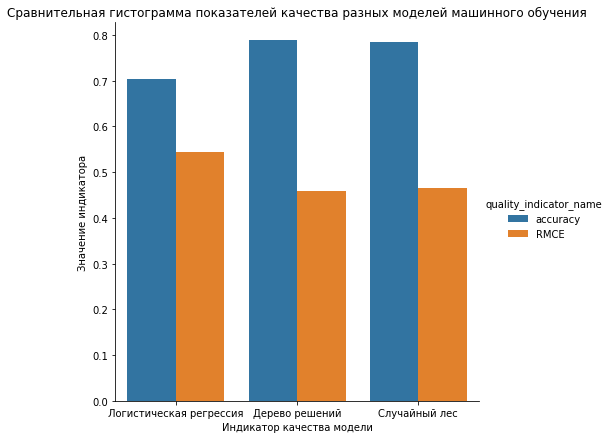

In [16]:
# Создадим сравнительный датасет
quality_dict = {'model_name' : [],
           'quality_indicator_name' : [],
           'quality_indicator_value' : []
           }

quality_data= pd.DataFrame(quality_dict)

for index, row in compare_data_test.iterrows():
    
    quality_data = quality_data.append(pd.DataFrame([[row['model_name'], 
                                                    'accuracy',
                                                    row['accuracy']]], 
                                                    columns = ['model_name', 
                                                               'quality_indicator_name', 
                                                               'quality_indicator_value']),
                                                    ignore_index=True)
    
    quality_data = quality_data.append(pd.DataFrame([[row['model_name'], 
                                                    'RMCE',
                                                    row['rmce']]], 
                                                    columns = ['model_name', 
                                                               'quality_indicator_name', 
                                                               'quality_indicator_value']),
                                                    ignore_index=True)




# Построим сравнительную диаграмму
g = sns.catplot(x="model_name", 
                y="quality_indicator_value", 
                hue="quality_indicator_name", 
                kind="bar",
                height=6,
#                aspect=1.5,
                data=quality_data)

g.set_axis_labels("Индикатор качества модели", "Значение индикатора")
g.ax.set_title("Сравнительная гистограмма показателей качества разных моделей машинного обучения")

In [17]:
compare_data_test[['model_name','hyperparam_name','hyperparam_value','accuracy','rmce']]

,model_name,hyperparam_name,hyperparam_value,accuracy,rmce
0,Логистическая регрессия,,0.0,0.702955,0.545018
1,Дерево решений,max_depth,7.0,0.788491,0.459901
2,Случайный лес,n_estimators,22.0,0.783826,0.464945


## ВЫВОД

<font color=blue><b>Наиболее адекватной моделью для решения поставленной задачи является модель 'Дерево решений' с глубиной дерева 7. Она лучшая по всем возможным параметрам.</b></font>

 1. Точность на тестовой выборке - наибольшая (78.8%).
 2. Отклонение результатов (корень среднеквадратичной ошибки) - наименьшее (0,46).
 
<font color=red><b>Для того, чтобы определить какой из актуальных тарифов предлагать пользователю мы рекомендуем использовать именно эту модель.</b></font>

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] Jupyter Notebook открыт
- [x] Весь код исполняется без ошибок
- [x] Ячейки с кодом расположены в порядке исполнения
- [x] Выполнено задание 1: данные загружены и изучены
- [x] Выполнено задание 2: данные разбиты на три выборки
- [x] Выполнено задание 3: проведено исследование моделей
    - [x] Рассмотрено больше одной модели
    - [x] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [x] Написаны выводы по результатам исследования
- [x] Выполнено задание 3: Проведено тестирование
- [x] Удалось достичь accuracy не меньше 0.75
